# **SESSION 7 PRACTICAL APPLICATION OF CLASSIFICATION**
============================================================================================================================================
- Date: 15/02/2023
- Student: Pablo Ostos Bollmann
- Professor: Pablo Gervás
- Master: MCSBT

============================================================================================================================================

First, we import the necessary libraries 

In [24]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# **TASKS**

### *All tasks are performed over 3 dataseets (iris, wine and marks), and for each of the datasets 3 classifiers are run, then the results are displayed and plotted.*

## **TASK1: Loading the Iris data set and at least one other**

In [25]:
iris = datasets.load_iris()
tot_iris = iris.data

wine = datasets.load_wine()
tot_wine = wine.data

marks = np.loadtxt("marks.txt", delimiter = ",")

In [26]:
print(iris.feature_names)
print(wine.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [27]:
print(iris.target_names)
print(wine.target_names)

['setosa' 'versicolor' 'virginica']
['class_0' 'class_1' 'class_2']


We have to slice the data in a valid set of columns so that we can perform a simple classification. 

Because of this, we have to choose just two of the columns in each of the datasets. So for the purpose of this exercise, for the iris dataset, we will just take the first two columns ('sepal length (cm)' and 'sepal width (cm)') and for the wine dataset another two columns ('alcohol' and 'malic_acid')

This way, we will be predicting if an observation belongs to a class or not. In the case of the iris dataset, we will be determining if a flower is type setosa (0) or not (1), on the other side we will be determining if a wine belongs to "class_1' or not

## **TASK2: Slicing a valid set of columns for a simple classification task**

In [28]:
Xiris = iris.data[:, :2]
Yiris = (iris.target != 0) * 1 

Xwine = wine.data[:, :2]
Ywine = (wine.target != 1) * 1 #wines of class_1

Xmarks = marks[:, :2]
Ymarks = marks[:, 2:3].astype(int).flatten()

In [29]:
print(Ymarks)

[0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]


We notice iris.data and wine.data give us a numpy array, where each element of the array is another array. What we do is for each element of the numpy array we only take the first two elements of that array. We end up with another numpy array, where each element is a two-element array. 

Then we store our target variable in Yiris, transforming all boolean elements in iris.target different than 0 and transform in from boolean to integer (*1)

For the marks dataset, we just need to differentiate the three columns in target and data. I also transformed the target to an integer so that the learner identifies it as categories 0 and 1

## **TASK3: Splitting  into training and test sets**

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

### **Iris**

In [30]:
from sklearn.model_selection import train_test_split

Xiris_train, Xiris_test, Yiris_train, Yiris_test = train_test_split(Xiris, Yiris, test_size=0.25, random_state=0)

### **Wine**

In [31]:
from sklearn.model_selection import train_test_split

Xwine_train, Xwine_test, Ywine_train, Ywine_test = train_test_split(Xwine, Ywine, test_size=0.25, random_state=0)

### **Marks**

In [32]:
from sklearn.model_selection import train_test_split

Xmarks_train, Xmarks_test, Ymarks_train, Ymarks_test = train_test_split(Xmarks, Ymarks, test_size=0.25, random_state=0)

## **TASK4: Plotting some versions of the data** 

Function to plot data

In [33]:
def plot_data_points(X, y):
   plt.figure(figsize=(10, 6))
   plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
   plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
   plt.legend();

### **Iris**

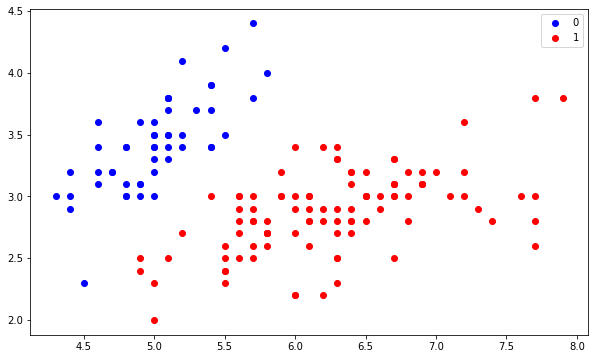

In [34]:
plot_data_points(Xiris, Yiris)

### **Wine**

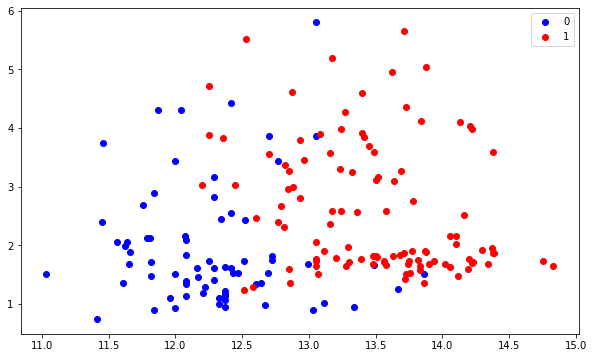

In [35]:
plot_data_points(Xwine, Ywine)

### **Marks**

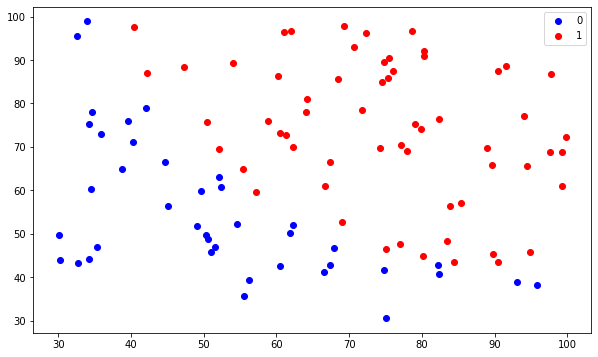

In [36]:
plot_data_points(Xmarks, Ymarks)

By plotting all the dataset we can verify that we can actually use a linear model that separates the observations into two categories. 

## **TASK5: Running a number of classifiers on it**

#### **Importing Classifiers**

In [37]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC    

from sklearn.naive_bayes import GaussianNB

### **Iris**

Logistic regression classifier for iris dataset

In [38]:
iris_modelSKL = LogisticRegression(C=1e20)
iris_modelSKL.fit(Xiris_train, Yiris_train)

iris_preds_LR = iris_modelSKL.predict(Xiris_test)

print(iris_preds_LR)

print(iris_modelSKL.intercept_, iris_modelSKL.coef_)

[1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0
 1]
[-237.08515035] [[ 123.78498766 -143.71788766]]


SCV Classifier for iris dataset

In [39]:
sv_iris_classifier = SVC(kernel='linear', degree=8)  
sv_iris_classifier.fit(Xiris_train, Yiris_train)  

Yiris_predSVM = sv_iris_classifier.predict(Xiris_test)

Naive bayesian classifier for iris

In [40]:
gnb_iris = GaussianNB()

gnb_iris.fit(Xiris_train, Yiris_train)

Yiris_pred_gnb = gnb_iris.predict(Xiris_test)

### **Wine**

Logistic regression classifier for wine dataset

In [41]:
wine_modelSKL = LogisticRegression(C=1e20)
wine_modelSKL.fit(Xwine_train, Ywine_train)

wine_preds_LR = wine_modelSKL.predict(Xwine_test)

print(wine_preds_LR)

print(wine_modelSKL.intercept_, wine_modelSKL.coef_)

[1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 0]
[-45.44717157] [[3.39605497 0.99181454]]


SCV Classifier for wine dataset

In [42]:
sv_wine_classifier = SVC(kernel='linear', degree=8)  
sv_wine_classifier.fit(Xwine_train, Ywine_train)  

Ywine_predSVM = sv_wine_classifier.predict(Xwine_test)

Naive bayesian classifier for wine

In [43]:
gnb_wine = GaussianNB()

gnb_wine.fit(Xwine_train, Ywine_train)

Ywine_pred_gnb = gnb_wine.predict(Xwine_test)

### **Marks**

Logistic regression classifier for marks dataset

In [44]:
marks_modelSKL = LogisticRegression(C=1e20)
marks_modelSKL.fit(Xmarks_train, Ymarks_train)

marks_preds_LR = marks_modelSKL.predict(Xmarks_test)

print(marks_preds_LR)

print(marks_modelSKL.intercept_, marks_modelSKL.coef_)

[0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0]
[-24.18223853] [[0.19162887 0.19514148]]


SCV Classifier for marks dataset

In [45]:
sv_marks_classifier = SVC(kernel='linear', degree=8)  
sv_marks_classifier.fit(Xmarks_train, Ymarks_train)  

Ymarks_predSVM = sv_marks_classifier.predict(Xmarks_test)

We can also try and change the kernel:

In [67]:

sv_marks_classifier_poly = SVC(kernel='poly', degree=8)  
sv_marks_classifier_poly.fit(Xmarks_train, Ymarks_train)  

Ymarks_predSVM_poly = sv_marks_classifier_poly.predict(Xmarks_test) 

Naive bayesian classifier for marks

In [47]:
gnb_marks = GaussianNB()

gnb_marks.fit(Xmarks_train, Ymarks_train)

Ymarks_pred_gnb = gnb_marks.predict(Xmarks_test)

## **TASK6: For each classifier, showing precision, recall and confusion matrix**

In [48]:
from sklearn.metrics import classification_report
from sklearn import metrics

### THEORY: 
- Confusion matrix: It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another. The values of TPR and TNR should be high, and FPR and FNR should be as low as possible.
- Out of the total positive, what percentage are predicted positive. It is the same as TPR (true positive rate).

### **Iris**

Logistic Regression report 

In [49]:
cm_iris_LR = metrics.confusion_matrix(Yiris_test, iris_preds_LR)
print(cm_iris_LR)

print(classification_report(Yiris_test, iris_preds_LR))

[[13  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Support Vector report

In [50]:
cm_iris_SV = metrics.confusion_matrix(Yiris_test, Yiris_predSVM)
print(cm_iris_SV)

print(classification_report(Yiris_test, Yiris_predSVM))

[[13  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



Naive Bayesian Report

In [51]:
cm_iris_gnb = metrics.confusion_matrix(Yiris_test, Yiris_pred_gnb)
print(cm_iris_gnb)

print(classification_report(Yiris_test, Yiris_pred_gnb))

[[13  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### These results are the most important part of the analysis. We notice that all three classifiers are able to predict perfectly both categories and assign a category to each of the observations. 

### **Wine**

Logistic Regression report 

In [52]:
cm_wine_LR = metrics.confusion_matrix(Ywine_test, wine_preds_LR)
print(cm_wine_LR)

print(classification_report(Ywine_test, wine_preds_LR))

[[19  2]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.92      1.00      0.96        24

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



Support Vector report

In [53]:
cm_marks_SV = metrics.confusion_matrix(Ymarks_test, Ymarks_predSVM)
print(cm_marks_SV)

print(classification_report(Ymarks_test, Ymarks_predSVM))

[[11  0]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25



Naive Bayesian Report

In [54]:

cm_wine_gnb = metrics.confusion_matrix(Ywine_test, Ywine_pred_gnb)
print(cm_wine_gnb)

print(classification_report(Ywine_test, Ywine_pred_gnb))

[[19  2]
 [ 0 24]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.92      1.00      0.96        24

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



### As we can see in the results, both naive bayesian and logistic regression predict perfectly the negative cases, but produce 2 false negatives. While the SVM madel predicts perfectly the positive cases while producing 2 false positives. 

### **Marks**

Logistic Regression report 

In [55]:
cm_marks_LR = metrics.confusion_matrix(Ymarks_test, marks_preds_LR)
print(cm_marks_LR)

print(classification_report(Ymarks_test, marks_preds_LR))

[[11  0]
 [ 4 10]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.71      0.83        14

    accuracy                           0.84        25
   macro avg       0.87      0.86      0.84        25
weighted avg       0.88      0.84      0.84        25



Support Vector report

In [56]:
cm_marks_SV = metrics.confusion_matrix(Ymarks_test, Ymarks_predSVM)
print(cm_marks_SV)

print(classification_report(Ymarks_test, Ymarks_predSVM))

[[11  0]
 [ 3 11]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25



In [68]:
cm_marks_SV_poly = metrics.confusion_matrix(Ymarks_test, Ymarks_predSVM_poly)
print(cm_marks_SV_poly)

print(classification_report(Ymarks_test, Ymarks_predSVM_poly))

[[11  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Naive Bayesian Report

In [57]:
cm_marks_gnb = metrics.confusion_matrix(Ymarks_test, Ymarks_pred_gnb)
print(cm_marks_gnb)

print(classification_report(Ymarks_test, Ymarks_pred_gnb))

[[11  0]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.86      0.92        14

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



### For the marks dataset we notice all models predict perfectly the positive cases while producing some false positives. Another consideration to make is the improvement that changing the kernel from linear to poly makes, having a perfect precision with the poly kernel. 

## **TASK7: For classifiers that involve a boundary line, plotting** 

We will be plotting the line for the logistic regression

In [58]:
def plotting_data_with_boundary3(X,y,b,w1,w2):
    # plot result
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend()
    
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2
    
    xmin = X[:,0].min()
    xmax = X[:,0].max()
    
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    
    plt.plot(xd, yd, 'k', lw=1, ls='--')

### **Iris**

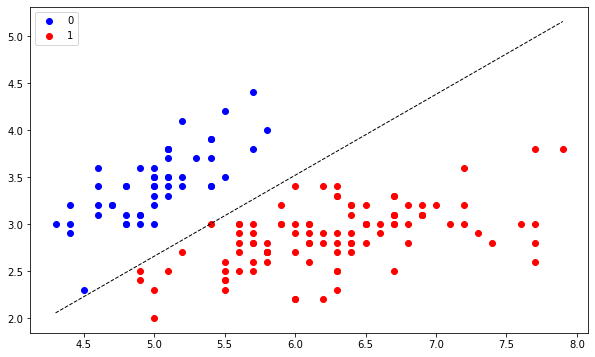

In [59]:
plotting_data_with_boundary3(Xiris,Yiris,iris_modelSKL.intercept_[0],iris_modelSKL.coef_.T[0],iris_modelSKL.coef_.T[1])

### **Wine**

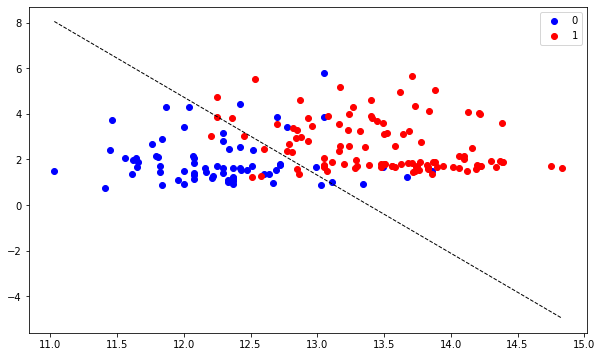

In [60]:
plotting_data_with_boundary3(Xwine,Ywine,wine_modelSKL.intercept_[0],wine_modelSKL.coef_.T[0],wine_modelSKL.coef_.T[1])

### **Marks**

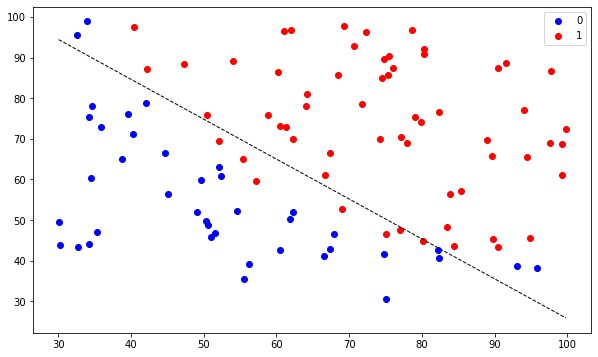

In [61]:
plotting_data_with_boundary3(Xmarks,Ymarks,marks_modelSKL.intercept_[0],marks_modelSKL.coef_.T[0],marks_modelSKL.coef_.T[1])

## **TASK8: For classifiers that involve support vectors, plotting them**

Now we will do the same with the sv model 

In [62]:
def plotting_data_with_boundary_sv(X,y,b,w1,w2,support_vectors):
    # plot result
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    plt.legend()
    
    # Calculate the intercept and gradient of the decision boundary.
    c = -b/w2
    m = -w1/w2
    
    xmin = X[:,0].min()
    xmax = X[:,0].max()
    
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    
    print(support_vectors[:, 0])    
    print(support_vectors[:, 1])
    
    plt.scatter(support_vectors[:, 0],
                   support_vectors[:, 1],
                   s=30, linewidth=1, color='y', label='SV');
    
    

### **Iris**

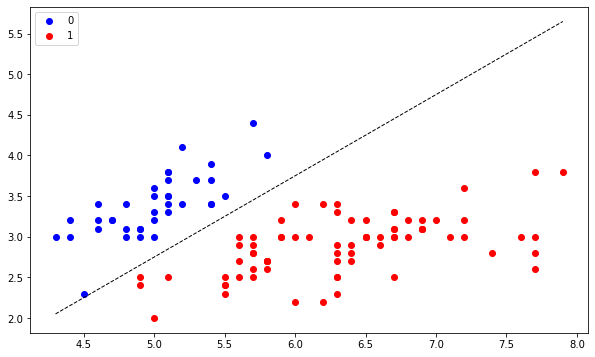

In [63]:
plotting_data_with_boundary3(Xiris_train,Yiris_train,sv_iris_classifier.intercept_[0],sv_iris_classifier.coef_.T[0],sv_iris_classifier.coef_.T[1])

### **Wine**

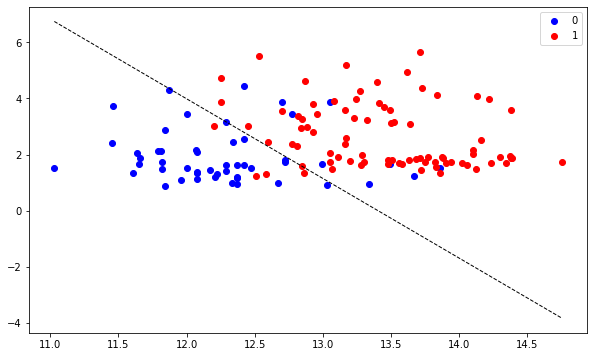

In [64]:
plotting_data_with_boundary3(Xwine_train,Ywine_train,sv_wine_classifier.intercept_[0],sv_wine_classifier.coef_.T[0],sv_wine_classifier.coef_.T[1])

### **Marks**

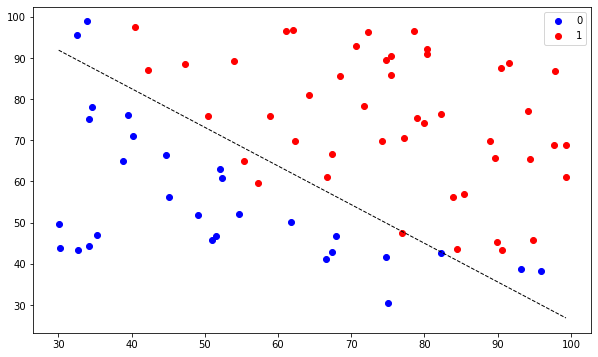

In [65]:
plotting_data_with_boundary3(Xmarks_train,Ymarks_train,sv_marks_classifier.intercept_[0],sv_marks_classifier.coef_.T[0],sv_marks_classifier.coef_.T[1])

[93.1143888  74.78925296 95.86155507 32.57720017 82.22666158 52.10797973
 39.53833914 33.91550011 90.54671411 76.97878373 55.34001756 66.74671857
 50.4581598  62.27101367 57.23870632 84.43281996 42.26170081]
[38.80067034 41.57341523 38.22527806 95.59854761 42.71987854 63.12762377
 76.03681085 98.86943574 43.39060181 47.57596365 64.93193801 60.99139403
 75.80985953 69.95445795 59.51428198 43.53339331 87.10385094]


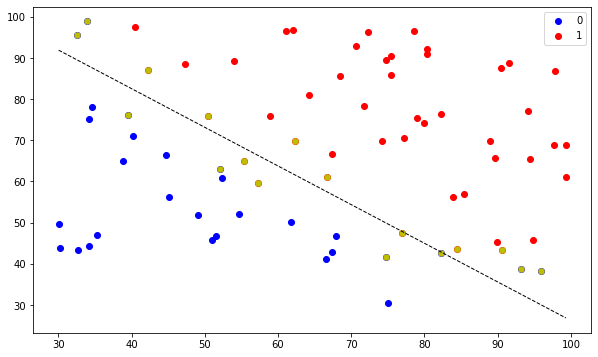

In [66]:

plotting_data_with_boundary_sv(Xmarks_train,Ymarks_train,sv_marks_classifier.intercept_[0],sv_marks_classifier.coef_.T[0],sv_marks_classifier.coef_.T[1], sv_marks_classifier.support_vectors_)